In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv('../data/coins2.csv')
dataset.head(5)

,size,weight,type
0,2.415939,3.006286,$2
1,2.938768,2.671729,$2
2,1.639263,1.877312,$1
3,1.374895,1.825525,$1
4,2.168431,2.262057,$2


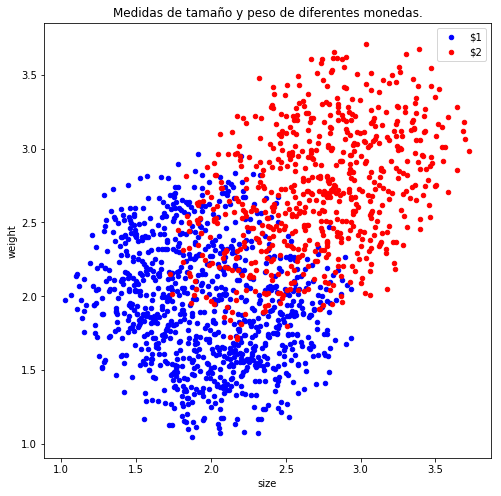

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = dataset[dataset.type == '$1'].plot.scatter('size', 'weight', c='blue', ax=ax)
dataset[dataset.type == '$2'].plot.scatter('size', 'weight', c='red', ax=ax)
ax.legend(['$1', '$2'])
ax.set_title('Medidas de tamaño y peso de diferentes monedas.');

# Aplique una regresion lineal para clasificar las monedas

In [12]:
dataset['y'] = dataset.type.apply(lambda x: +1 if x == '$2' else -1)
dataset['x0'] = 1 

In [17]:
X = dataset[['x0', 'size', 'weight']]
X.head()

,x0,size,weight
0,1,2.415939,3.006286
1,1,2.938768,2.671729
2,1,1.639263,1.877312
3,1,1.374895,1.825525
4,1,2.168431,2.262057


In [20]:
w = np.dot(np.linalg.pinv(X), dataset.y)
w

array([-3.75379132,  0.76852209,  0.80912299])

In [131]:
dataset['yhat'] = np.dot(X, w)

def rates(threshold):
    dataset['guess'] = dataset.yhat.apply(lambda x: '$2' if x > threshold else '$1')
    true_positive = (dataset[dataset.type == '$2'].guess == '$2').sum()
    tpr = true_positive/(dataset.type == '$2').sum()
    
    false_positive = (dataset[dataset.type != '$2'].guess == '$2').sum()
    fpr = false_positive/(dataset.type != '$2').sum()
    return tpr, fpr

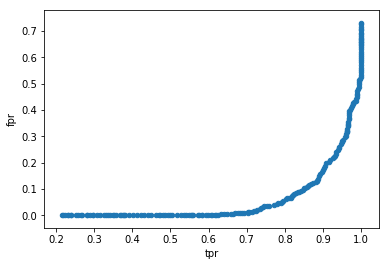

In [132]:
tprs = []
fprs = []
for t in range(-100,100, 1):
    tpr, fpr = rates(t/100)
    tprs.append(tpr)
    fprs.append(fpr)
pd.DataFrame({'tpr': tprs, 'fpr': fprs}).plot.scatter('tpr', 'fpr')

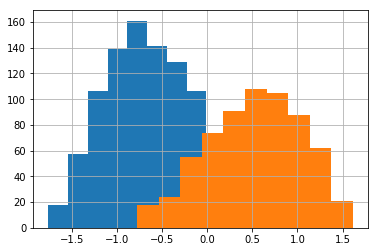

In [133]:
dataset[dataset.type == '$1'].yhat.hist()
dataset[dataset.type == '$2'].yhat.hist()

# Cree nuevas variables mediante transformaciones no lineales de `size` y `weight`

In [134]:
dataset['size2'] = dataset['size']*dataset['size']
dataset['weight2'] = dataset['weight']*dataset['weight']

In [135]:
X = dataset[['x0', 'size', 'weight', 'size2', 'weight2']]
w = np.dot(np.linalg.pinv(X), dataset.y)
w

array([-4.83372706,  1.29500898,  1.25284166, -0.11216055, -0.09319777])

In [136]:
dataset['yhat'] = np.dot(X, w)

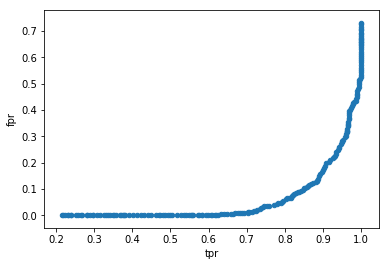

In [137]:
tprs = []
fprs = []
for t in range(-100,100, 1):
    tpr, fpr = rates(t/100)
    tprs.append(tpr)
    fprs.append(fpr)
pd.DataFrame({'tpr': tprs, 'fpr': fprs}).plot.scatter('tpr', 'fpr')

# Dibuje la curva de decision (decision boundary)

In [ ]:
#ax.pcolor
#ax.contour